## Introdução

## Análise Exploratória
Importando bibliotecas!

In [89]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plot
import numpy as np # álgebra linear
import os # acesso ao diretório
import pandas as pd # processamento dos dados .csv
import math

Há 6 arquivos CSV na versão atual do conjunto de dados:

In [90]:
for dirname, _, filenames in os.walk('/home/rafatokairin/uni-programs/ic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/rafatokairin/uni-programs/ic/starter-cbis-ddsm-breast-cancer-image-eef73d6f-4.ipynb
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.225893167712705639706899641612088401339/1-235.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.2448529311758051613285357123953923871/1-227.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.192830829713156688526768249872322016275/1-142.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.113350120012623011036337649930502791128/2-005.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.113350120012623011036337649930502791128/1-025.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.142885277611638033110611880230769163368/1-251.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.245550762511135550738178630953626561752/1-283.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.244954685311680838328330689690705833279/2-

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [91]:
# Função gráficos de distribuição (histograma/gráfico de barras) dos dados das colunas
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # Para fins de exibição, selecione colunas com 1 a 50 valores únicos
    nRow, nCol = df.shape
    columnNames = list(df)
    
    # Garantir que nGraphRow seja um número inteiro
    nGraphRow = math.ceil(nCol / nGraphPerRow)
    
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [92]:
# Função matriz de correlação
def plotCorrelationMatrix(df, graphWidth):
    filename = getattr(df, 'dataframeName', 'Unnamed DataFrame')
    
    # Remove colunas com valores NaN
    df = df.dropna(axis='columns')
    
    # Manter apenas colunas com mais de 1 valor único
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # Filtrar apenas colunas numéricas
    df = df.select_dtypes(include=[float, int])
    
    # Verificar se há colunas suficientes para calcular a correlação
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    # Calcular matriz de correlação
    corr = df.corr()
    
    # Plotar a matriz de correlação
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()



In [93]:
# Função gráficos de dispersão e densidade
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # Manter apenas colunas numéricas
    
    # Remover colunas com valores NaN
    df = df.dropna(axis='columns')
    
    # Manter colunas com mais de 1 valor único
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    columnNames = list(df)
    
    # Limitar o número de colunas para evitar problemas com inversão de matriz
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    
    df = df[columnNames]
    
    # Criar a matriz de dispersão
    ax = pd.plotting.scatter_matrix(
        df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde'
    )
    
    # Adicionar coeficientes de correlação na matriz
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(
            f'Corr. coef = {corrs[i, j]:.3f}',
            (0.8, 0.2),
            xycoords='axes fraction',
            ha='center',
            va='center',
            size=textSize,
        )
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Agora você está pronto para carregar os dados e usar as funções de plotagem para visualizá-los.

### Vamos verificar 1st arquivo: /kaggle/input/csv/calc_case_description_test_set.csv

In [94]:
nRowsRead = 1000 # especifique 'None' se quiser ler o arquivo inteiro
# calc_case_description_test_set.csv pode ter mais linhas na realidade, mas estamos carregando/visualizando apenas as primeiras 1000 linhas
df1 = pd.read_csv('/home/rafatokairin/uni-programs/ic/csv/calc_case_description_test_set.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'calc_case_description_test_set.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 326 rows and 14 columns


Vamos dar uma olhada rápida em como os dados se apresentam:

In [95]:
df1.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [109]:
# dimensões do arquivo
df1.shape

(326, 14)

In [110]:
# informações do arquivo
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

Verifica nulos no arquivo

In [111]:
df1.isnull().sum()

patient_id                  0
breast density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
calc type                   4
calc distribution          63
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

Verificar os valores únicos em cada coluna

In [113]:
valores_unicos = []
for i in df1.columns[0:15].tolist():
    print(i, ':', len(df1[i].astype(str).value_counts()))
    valores_unicos.append(len(df1[i].astype(str).value_counts()))

patient_id : 151
breast density : 5
left or right breast : 2
image view : 2
abnormality id : 5
abnormality type : 1
calc type : 21
calc distribution : 8
assessment : 5
pathology : 3
subtlety : 5
image file path : 284
cropped image file path : 326
ROI mask file path : 326


In [114]:
df1.describe()

,breast density,abnormality id,assessment,subtlety
count,326.000000,326.000000,326.000000,326.000000
mean,2.696319,1.214724,3.453988,3.319018
std,0.909667,0.529061,1.188159,1.188175
min,0.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.000000,4.000000,3.000000
75%,3.000000,1.000000,4.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000


Gráficos de distribuição (histograma/gráfico de barras) das colunas amostradas:

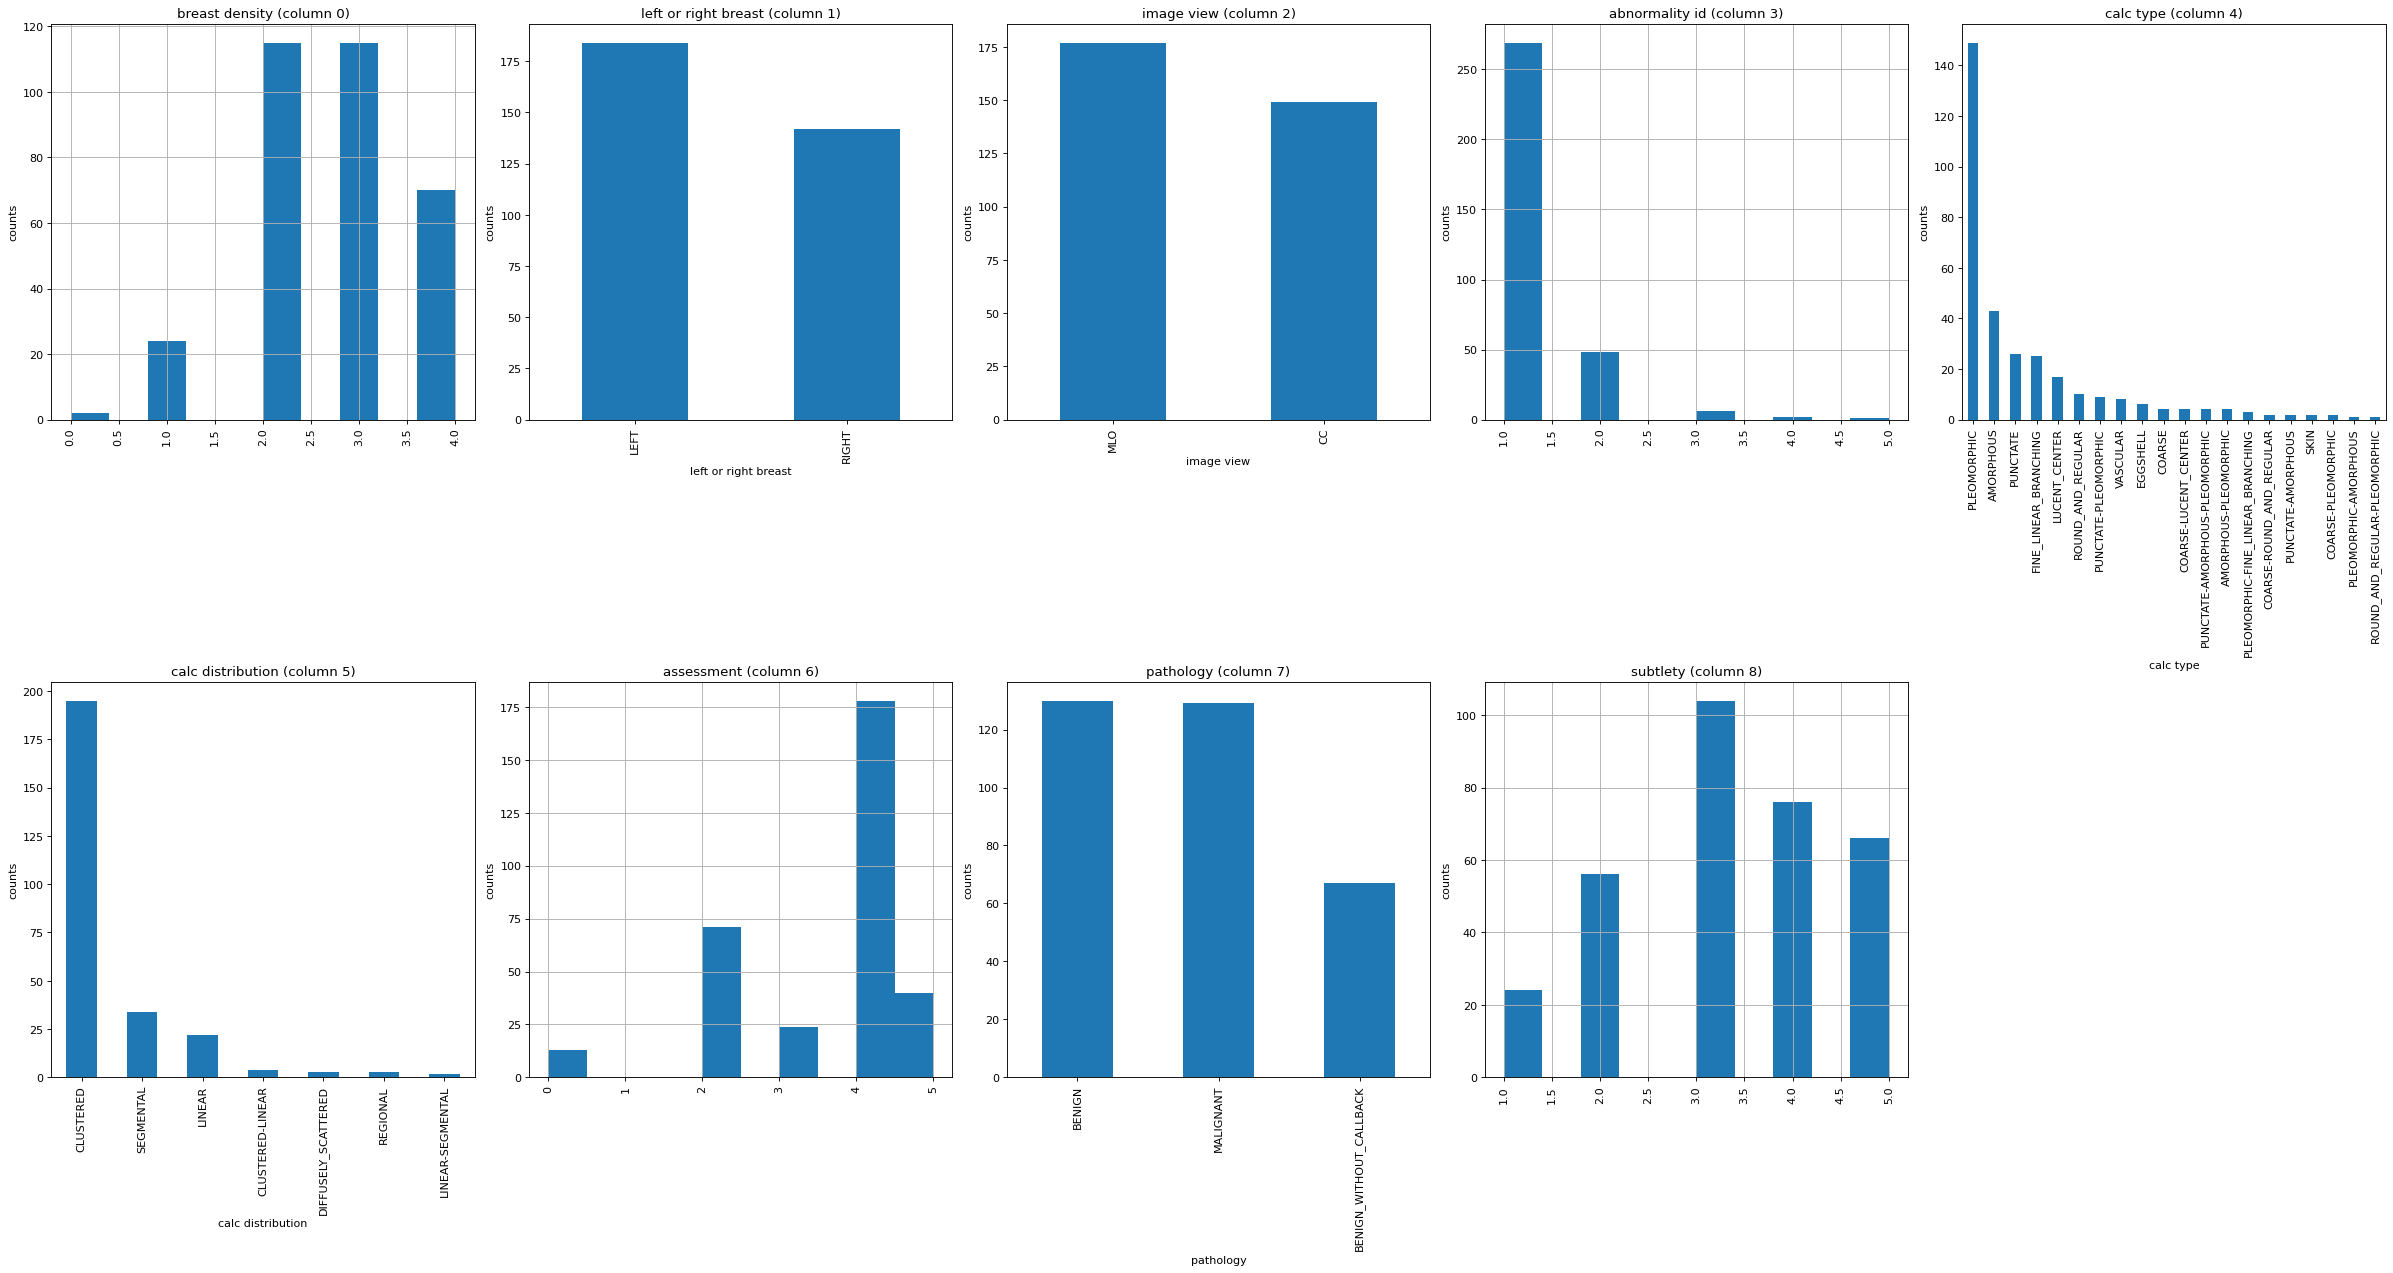

In [96]:
plotPerColumnDistribution(df1, 10, 5)

Matriz de correlação:

<Figure size 640x640 with 0 Axes>

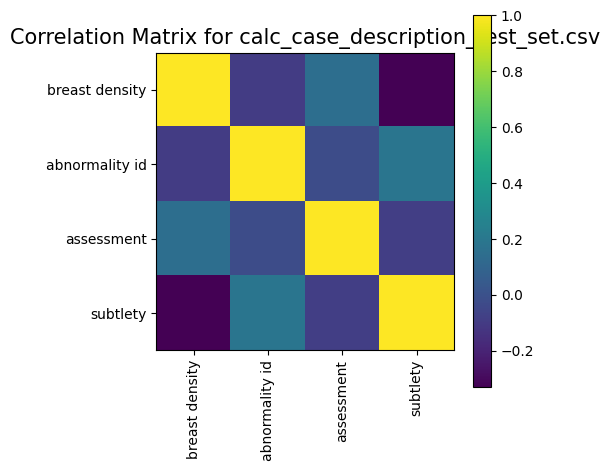

In [97]:
plotCorrelationMatrix(df1, 8)

Gráficos de dispersão e densidade:

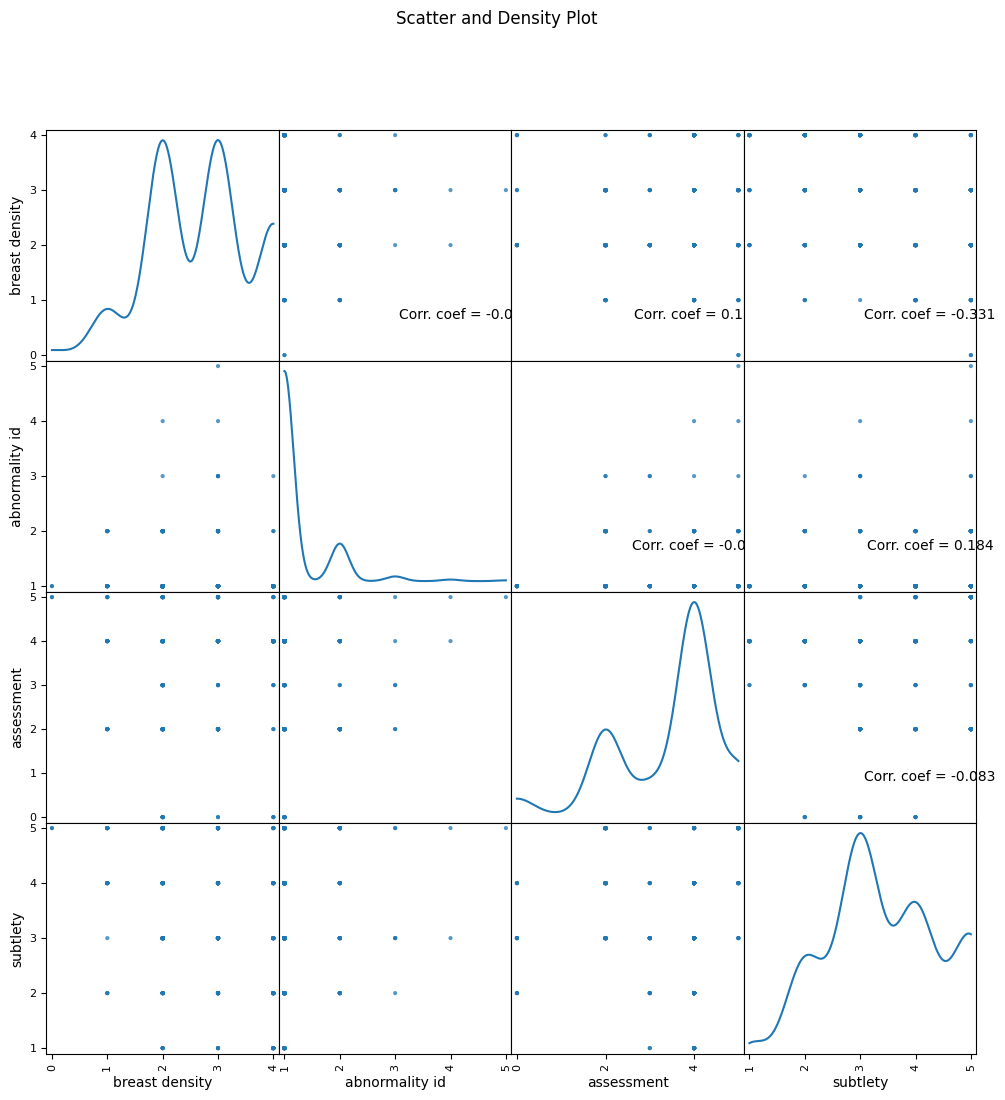

In [98]:
plotScatterMatrix(df1, 12, 10)

### Vamos verificar 2nd arquivo: /kaggle/input/csv/meta.csv

In [99]:
nRowsRead = 1000 # especifique 'None' se quiser ler o arquivo inteiro
# meta.csv pode ter mais linhas na realidade, mas estamos carregando/visualizando apenas as primeiras 1000 linhas
df2 = pd.read_csv('/home/rafatokairin/uni-programs/ic/csv/meta.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'meta.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


Vamos dar uma olhada rápida em como os dados se apresentam:

In [100]:
df2.head(5)

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


Distribution graphs (histogram/bar graph) of sampled columns:

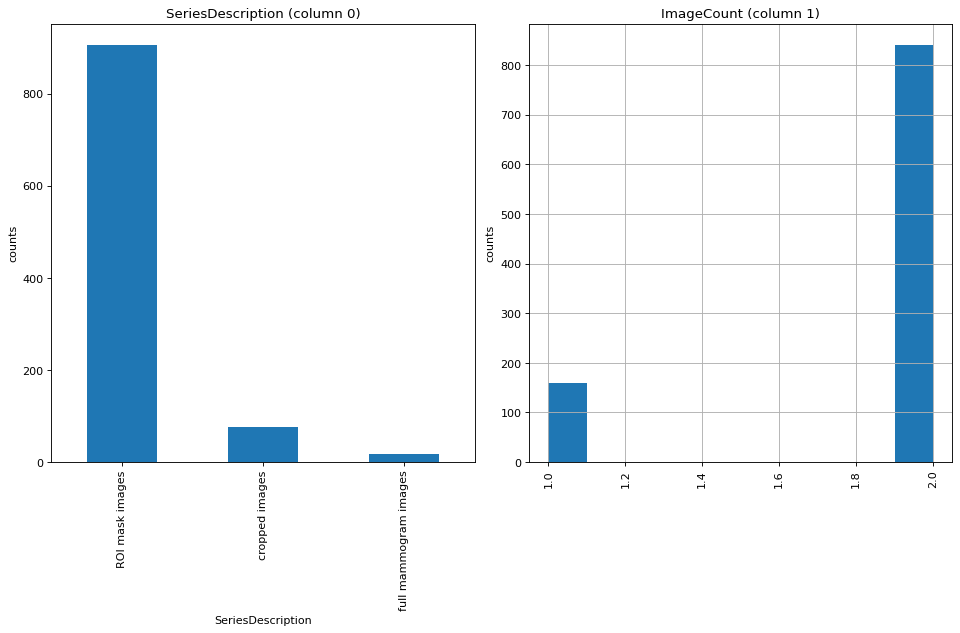

In [101]:
plotPerColumnDistribution(df2, 10, 5)

Matriz de correlação:

In [102]:
plotCorrelationMatrix(df2, 8)

No correlation plots shown: The number of non-NaN or constant columns (1) is less than 2


Gráficos de dispersão e densidade:

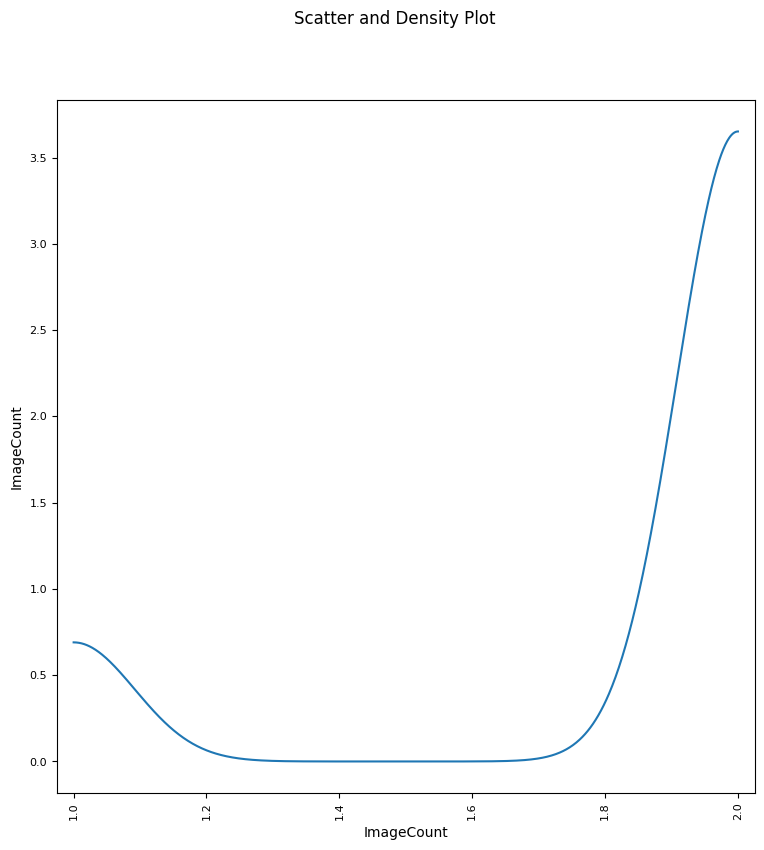

In [103]:
plotScatterMatrix(df2, 9, 10)

### Vamos verificar 3rd arquivo: /kaggle/input/csv/mass_case_description_train_set.csv

In [1]:
nRowsRead = 1000 # especifique 'None' se quiser ler o arquivo inteiro
# mass_case_description_train_set.csv pode ter mais linhas na realidade, mas estamos carregando/visualizando apenas as primeiras 1000 linhas
df3 = pd.read_csv('/home/rafatokairin/uni-programs/ic/csv/mass_case_description_train_set.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'mass_case_description_train_set.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

NameError: name 'pd' is not defined

Vamos dar uma olhada rápida em como os dados se apresentam:

In [105]:
df3.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


Gráficos de distribuição (histograma/gráfico de barras) das colunas amostradas:

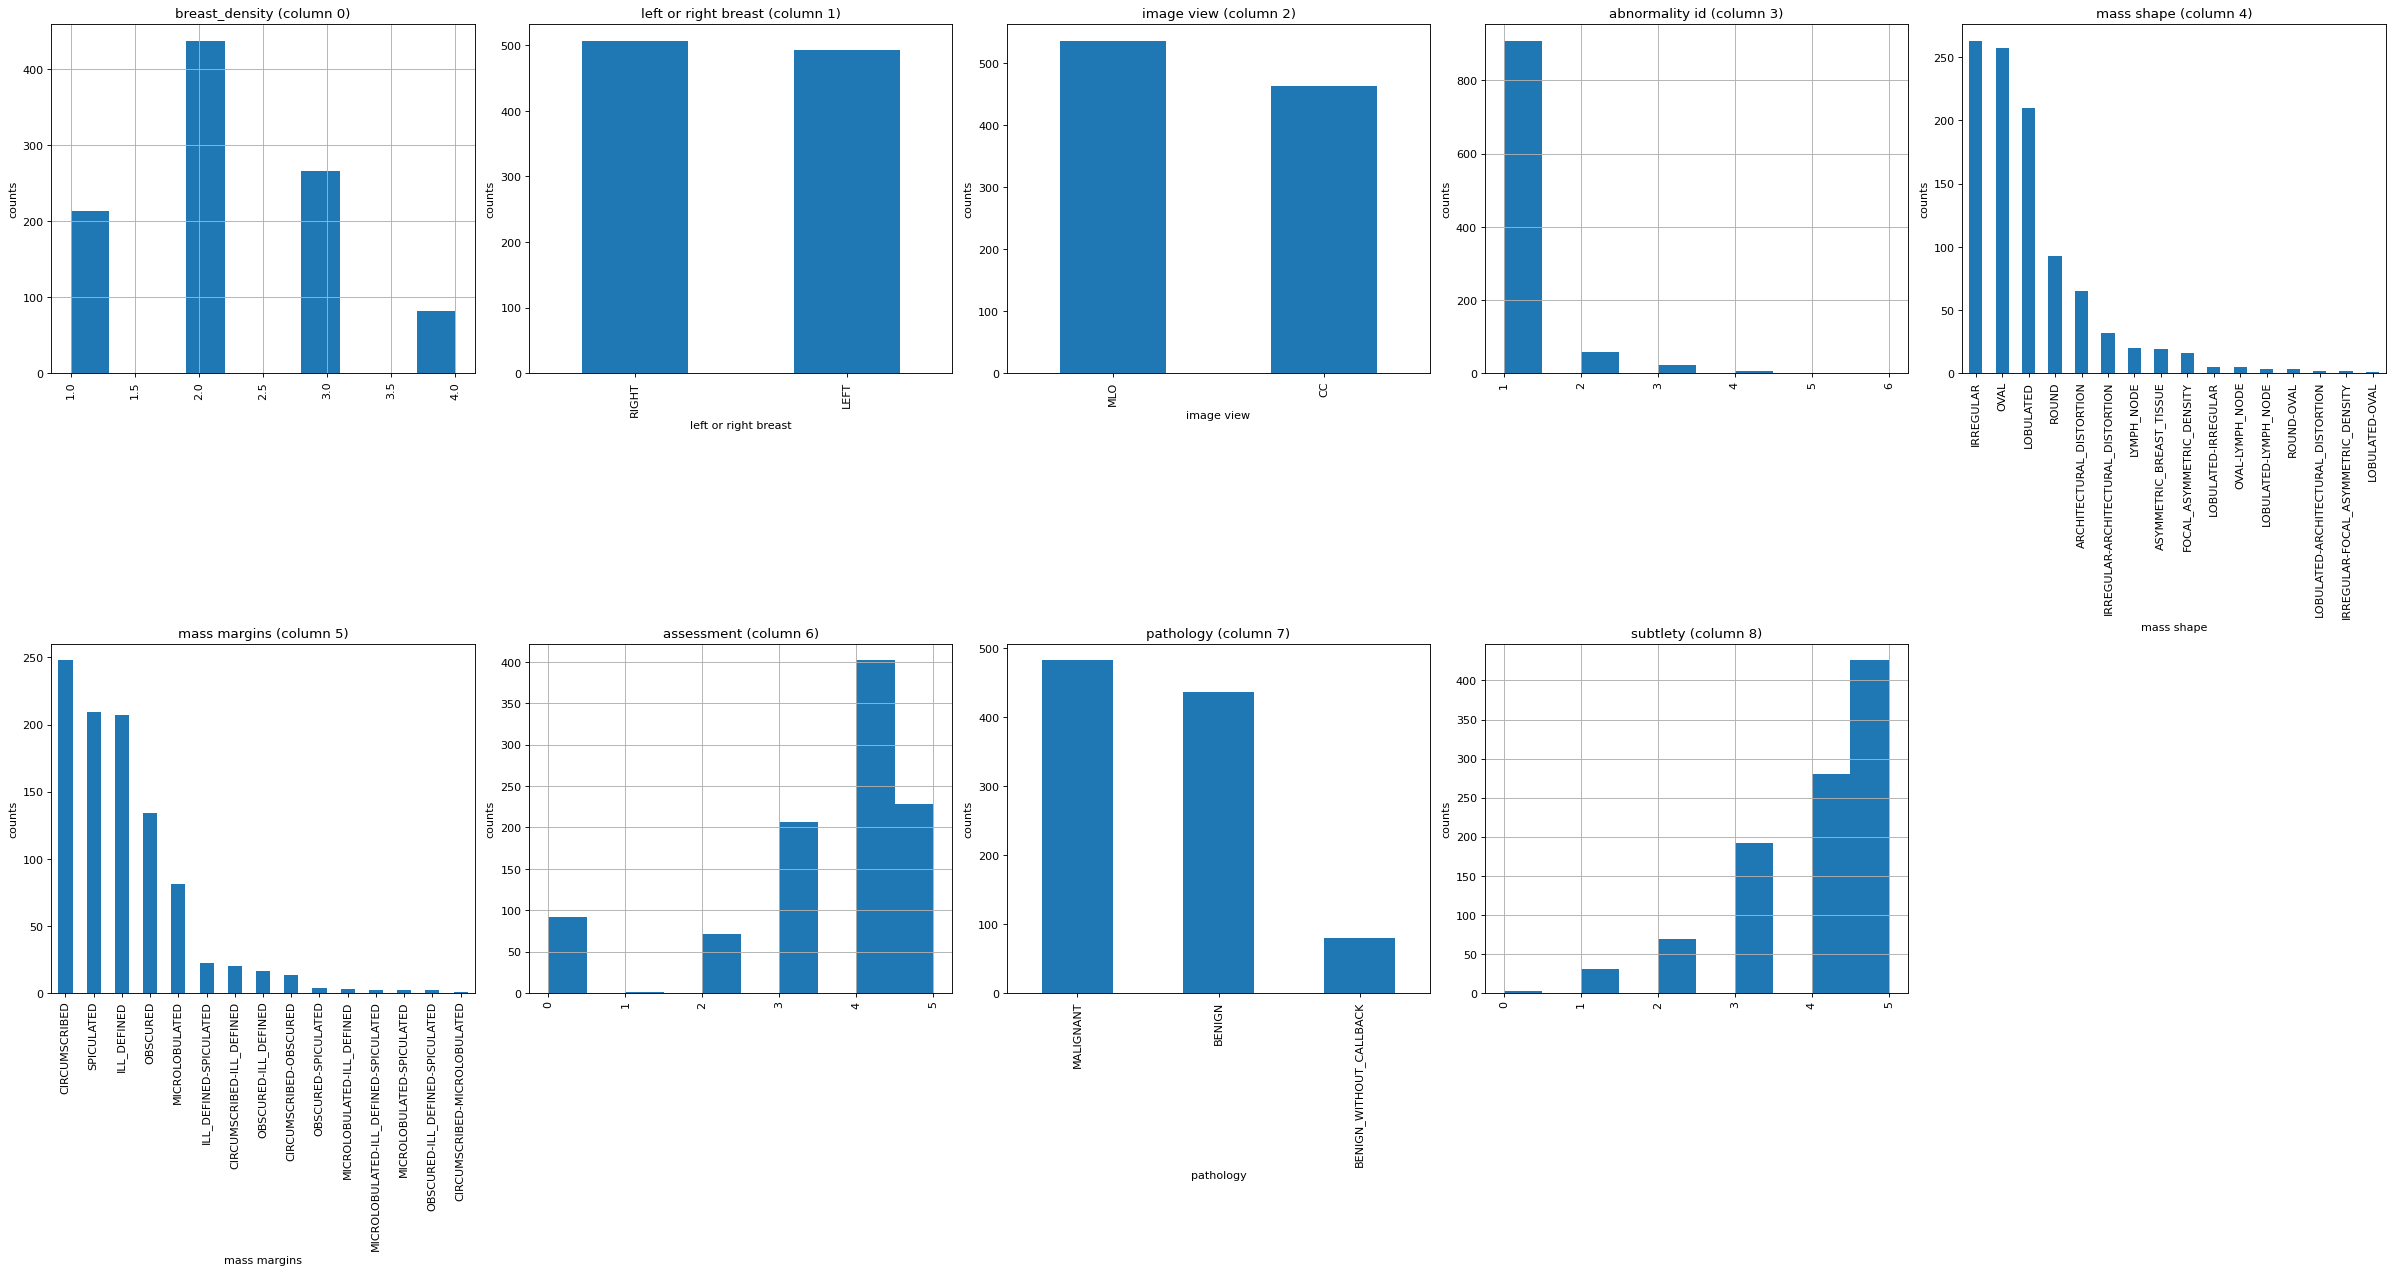

In [106]:
plotPerColumnDistribution(df3, 10, 5)

Matriz de correlação:

<Figure size 640x640 with 0 Axes>

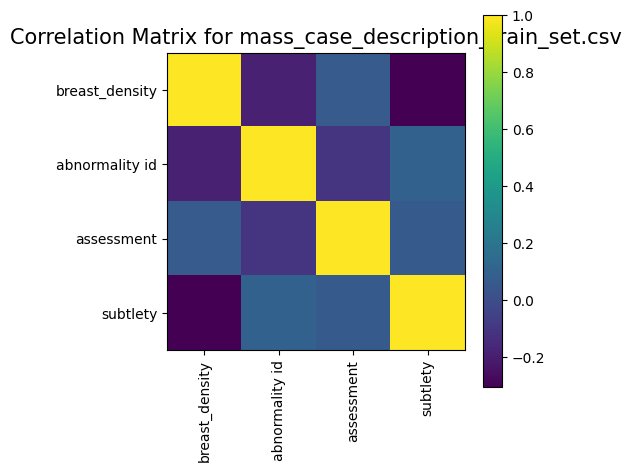

In [107]:
plotCorrelationMatrix(df3, 8)

Gráficos de dispersão e densidade:

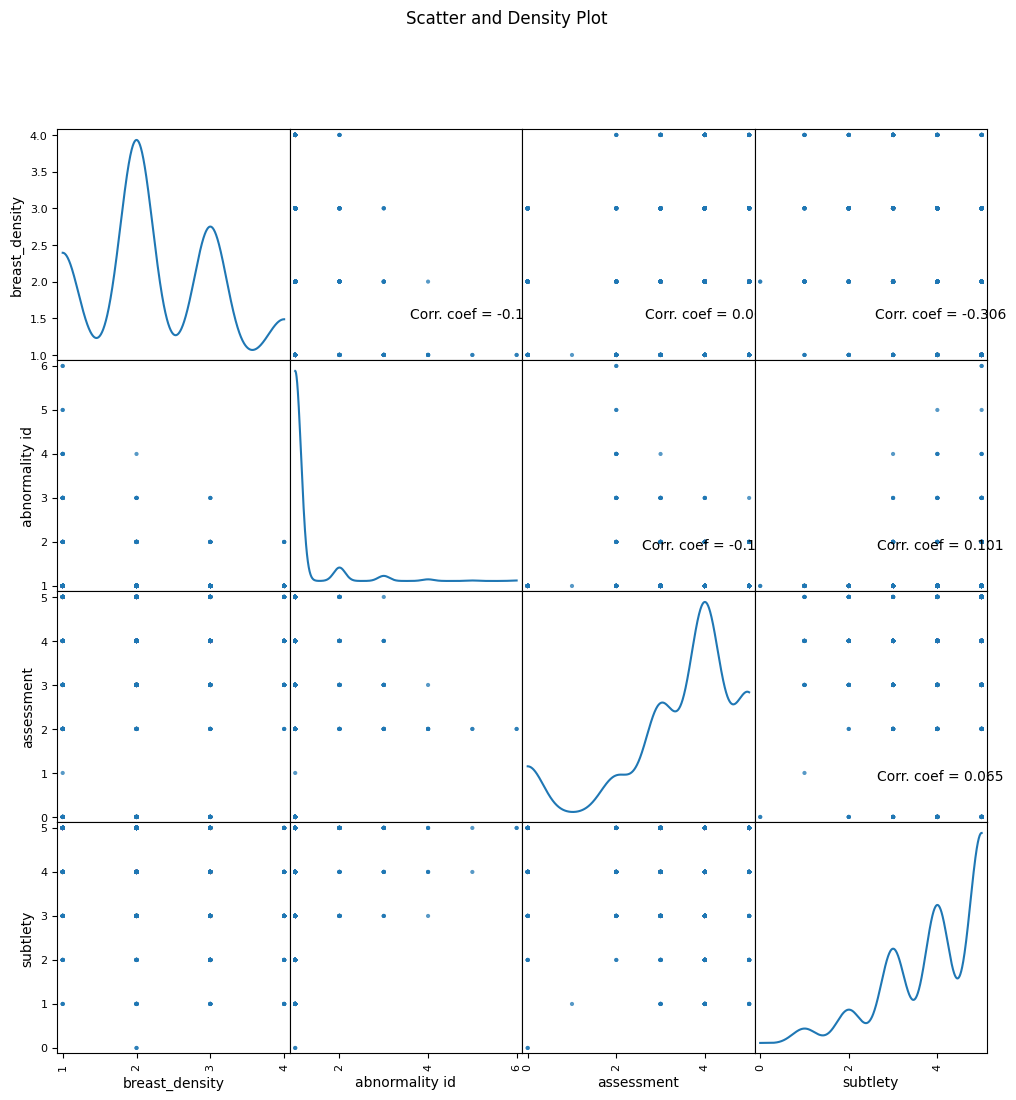

In [108]:
plotScatterMatrix(df3, 12, 10)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!